<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Decision Tree
</h1><center/>

**Link to the article** : https://medium.com/@soulawalid/decision-tree-21c3c2f5a68c?sk=b6fc236fe977672cba2e03c3993425ad

## Regression

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")

In [18]:
data = {
    'Square Footage': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000],
    'Price': [300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450]
}
df = pd.DataFrame(data)
df

,Square Footage,Price
0,1500,300
1,1600,310
2,1700,320
3,1800,330
4,1900,340
5,2000,350
6,2100,360
7,2200,370
8,2300,380
9,2400,390


In [19]:
X = df[['Square Footage']]
y = df['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
dt_regressor = DecisionTreeRegressor()

In [22]:
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(dt_regressor, param_grid, cv=2)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 2}


In [23]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 175.0


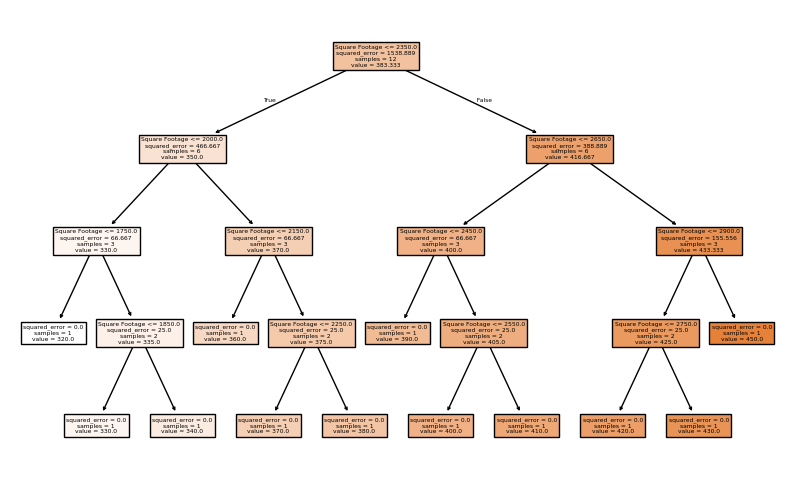

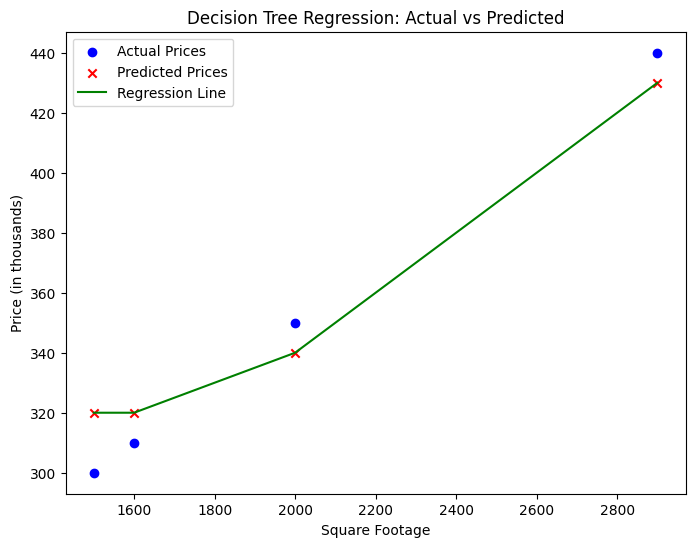

In [25]:
plt.figure(figsize=(10, 6))
plot_tree(best_model, feature_names=['Square Footage'], filled=True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')  # Actual prices
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', marker='x')  # Predicted prices
plt.plot(X_test, y_pred, color='green', label='Regression Line')  # Regression line
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Square Footage')
plt.ylabel('Price (in thousands)')
plt.legend()
plt.show()

## Classification

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [29]:
iris = load_iris()

In [30]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'ccp_alpha': [0.01, 0.05, 0.1]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [53]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


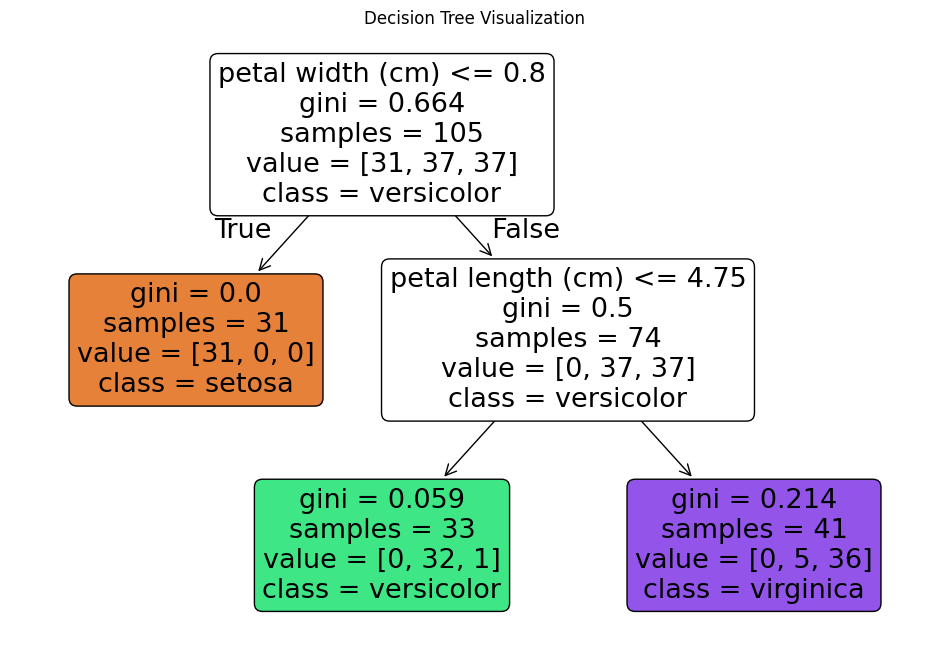

In [56]:
plt.figure(figsize=(12, 8))
plot_tree(best_dt, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()